---
# Zadaća 6
##### Rok za predaju: 21. travnja, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: Petar Kelava

---

In [1]:
from sklearn.cluster import KMeans
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import calinski_harabasz_score

## Zadatak 1
Učitajte podatke koji su vam dani u datoteci 'z1-data.csv'. <br>
Implementirajte k-means algoritam tako da mu ulazni parametri bude broj klastera i da algoritam pokrećete 10 puta sa slučajno odabranim podacima iz zadanog skupa podataka kao početnim centrima te vratite onu particiju koja ima najmanju vrijednost kriterijske funkcije (od tih 10 dobivenih particija). <br>

Kada ste implementirali algoritam, pokrenit ćete ga sa nizom različitih vrijednosti za $K$ - broj klastera. 
- Pokrenite algoritam za $K = 2, 3, 4, 5, 6, 7, 8, 9, 10$
- Za svaki $K$ napravite sljedeće
    - Ispišite broj koraka potreban da algoritam konvergira
    - Ispišite vrijednostu kriterijske funkcije za dobivenu particiju
    - Grafički prikažite podatke s naznačenim centrima. 
- Za jedno od pokretanja nacrtajte graf promjene vrijednosti kriterijske funkcije kroz korake izvršavanja algoritma
- Kada ste pokrenuli algoritam za sve vrijednosti $K$, nacrtajte graf promjene vrijednosti kriterijske funkcije u dobivenoj particiji za $K = 2,3,4,5,6,7,8,9,10$.
    - Za koji izbor $K$ će vrijednost kriterijske funkcije biti najmanja i zašto?
    - Koji broj klastera biste odabrali kao primjeren i zašto?

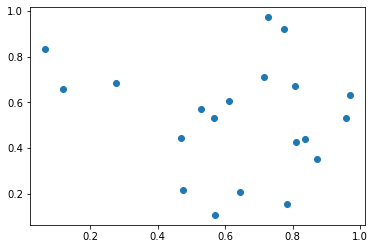

In [2]:
X = np.load('z1-data.npy')
plt.scatter(X[:,0], X[:,1])
plt.show()

In [3]:
def Distance(X,Y):
    return np.linalg.norm(X-Y,ord=2)

In [4]:
def CostFunction(X, centers):
    totalSum = 0.0
    
    for i in X:
        #Najveci moguci float broj
        toAdd = np.iinfo(np.int32).max * 1.0
        for u in centers:
            distance = Distance(i,u)
            if toAdd > distance:
                toAdd = distance
        
        totalSum = totalSum + toAdd
    
    return totalSum
            

In [5]:
def UpdateStep(X, centers, numClusters):
    #skup uređenih parova (element, njemu_najbliži_centar)
    elements = [[x] for x in X]
    
    #Svakom elementu pridružujemo njemu najbolji centar
    for i in range(X.shape[0]):
        
        minDistance = np.iinfo(np.int32).max * 1.0
        
        for j in range(centers.shape[0]):
            
            #Udaljenost između i-tog elementa i j-tog centra
            distance = Distance(np.array(elements[i][0]), np.array(centers[j]))
            
            if len(elements[i]) == 1:
                elements[i].append(centers[j])
                minDistance = distance
            elif minDistance >= distance:
                elements[i][1] = centers[j]
                minDistance = distance
            
    labels = np.zeros(shape = (len(elements), 1))
    newPartition = []
    for i in range(centers.shape[0]):
        cluster = []
        counter = 0
        for j in elements:
            if not(False in(j[1] == centers[i])):
                cluster.append(np.array(j[0]))
                labels[counter] = int(i)
            counter = counter + 1
        
        if(cluster != []):
            newPartition.append(np.array(cluster))
    
    newPartition = np.array(newPartition)
    return newPartition, labels

In [6]:
def NewCenters(clusters,numClusters):
    centers = np.zeros(shape=(clusters.shape[0],clusters[0].shape[1]))
    
    for i in range(clusters.shape[0]):
        cluster = clusters[i]
        Xcoordinate = np.sum(cluster[:,0])/cluster[:,0].shape[0]
        Ycoordinate = np.sum(cluster[:,1])/cluster[:,1].shape[0]
        centers[i] = np.array([Xcoordinate,Ycoordinate])
    
    return centers

In [7]:
def MyKMeans(X, numClusters):
    
    index = np.random.choice(X.shape[0], numClusters, replace=False)  
    newCenters = X[index]
    
    oldCenters = np.zeros(shape = (numClusters,1))
    numIter = 0
    partition = []
    costs = []
    while not(np.array_equal(oldCenters,newCenters)):
        partition, labels = UpdateStep(X, newCenters, numClusters)
        oldCenters = np.array(newCenters)
        newCenters = NewCenters(np.array(partition),numClusters)
        numIter = numIter + 1
        costs.append(CostFunction(X,oldCenters))

    return newCenters, partition, numIter, costs, labels

k =  2


<ipython-input-5-f26f247b7dad>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  newPartition = np.array(newPartition)


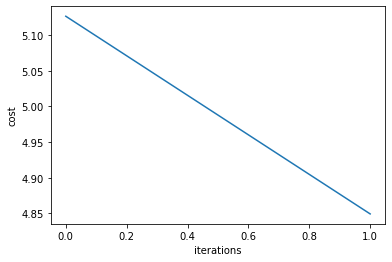

Broj iteracija:  2 Cijena:  4.849231257860008


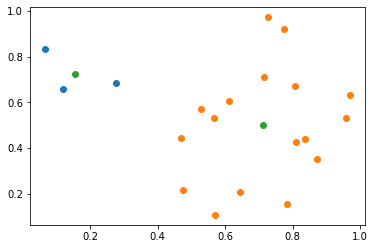

k =  3


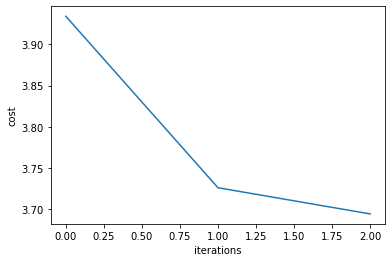

Broj iteracija:  3 Cijena:  3.6942673570240556


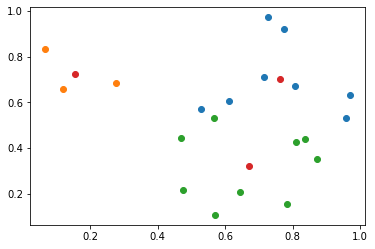

k =  4


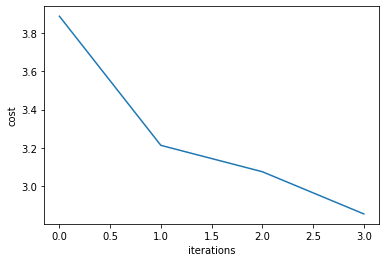

Broj iteracija:  4 Cijena:  2.853408974222107


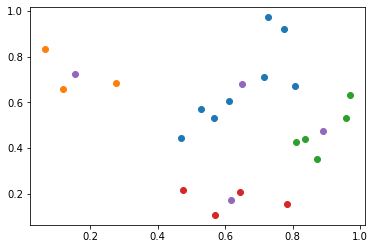

k =  5


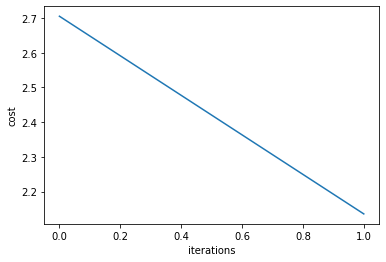

Broj iteracija:  2 Cijena:  2.135722496743857


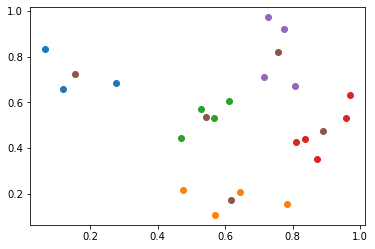

k =  6


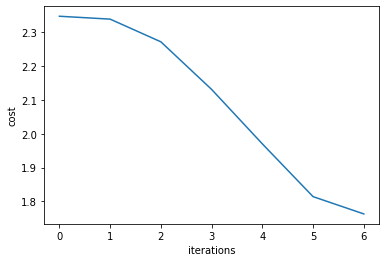

Broj iteracija:  7 Cijena:  1.7628624485878048


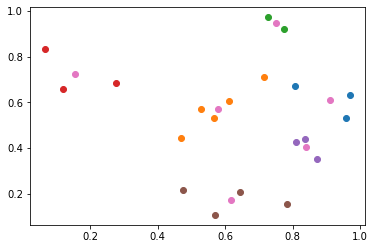

k =  7


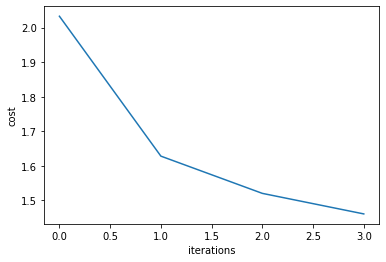

Broj iteracija:  4 Cijena:  1.4608455684856234


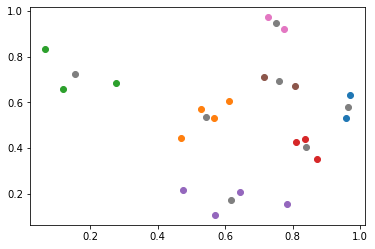

k =  8


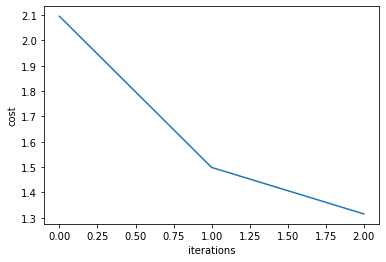

Broj iteracija:  3 Cijena:  1.315299932553281


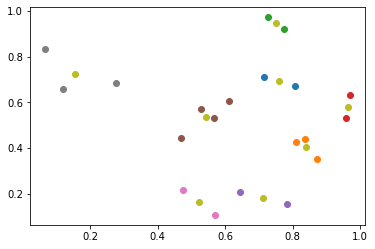

k =  9


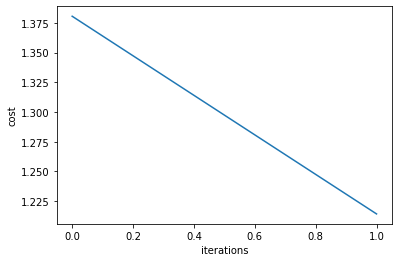

Broj iteracija:  2 Cijena:  1.2142185507936527


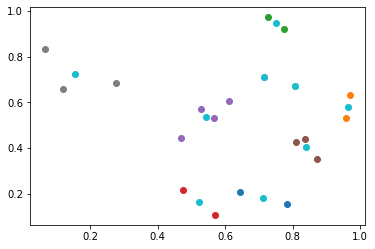

k =  10


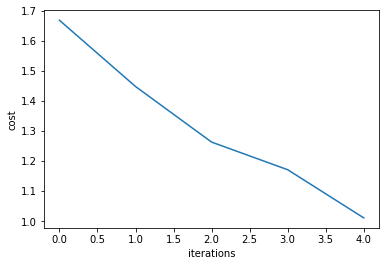

Broj iteracija:  5 Cijena:  1.0102156255081236


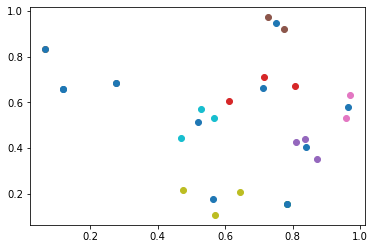

In [8]:
costChanges = []
for k in range(2,11):
    print("k = ", k)
    bestCenters, bestPartition, bestIterations, bestChanges, bestLabels = MyKMeans(X, k)
    bestCost = CostFunction(X, bestCenters)
    
    for j in range(9):
        centers, partition, iters, changes, labels = MyKMeans(X, k)
        cost = CostFunction(X,centers)
        if(bestCost > cost):
            bestCenters, bestPartition, bestIterations, bestCost, bestChanges, bestLabels = centers, partition, iters, cost, changes, labels
    
    costChanges.append(bestCost)
    
    plt.plot(bestChanges)
    plt.xlabel("iterations")
    plt.ylabel("cost")
    plt.show()
    
    print("Broj iteracija: ", bestIterations, "Cijena: ", bestCost)
    
    for i in range(bestPartition.shape[0]):
        plt.scatter(bestPartition[i][:,0], bestPartition[i][:,1])
    plt.scatter(bestCenters[:,0], bestCenters[:,1])
    plt.show()   

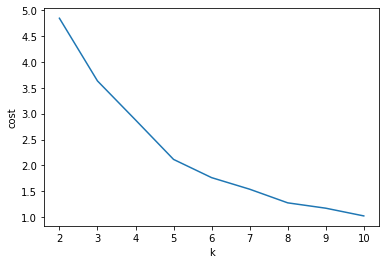

In [9]:
plt.plot(np.arange(2,11),costChanges)
plt.xlabel("k")
plt.ylabel("cost")
plt.show()

---
## Zadatak 2
Učitajte podatke koji su vam dani u datoteci 'z2-data.csv'. <br>
Primjenom k-means algortima implementiranog u prethodnim zadacima pokrenite algoritam za $K = 2,3,4,5,6,7,8,9,10$. <br>
- Za svaki $K$, kada ste pokrenuli algoritam i dobili particiju, izračunajte vrijednost funkcije $\mathcal{F}_{LS}$
- Za svaki $K$, kada ste pokrenuli algoritam i dobili particiju, izračunajte Calinski–Harabasz indeks

Koju particiju biste odabrali kao primjerenu na temelju izračunatih indeksa? Obrazložite. 

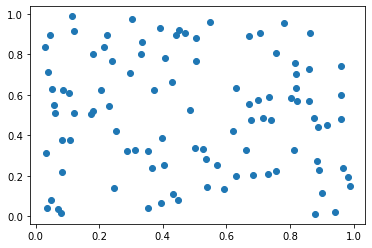

In [29]:
X = np.load('z2-data.npy')
plt.scatter(X[:,0], X[:,1])
plt.show()

k =  2
Cijena:  28.477920172541364 Calinski–Harabasz indeks:  70.86155821174877


<ipython-input-5-f26f247b7dad>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  newPartition = np.array(newPartition)


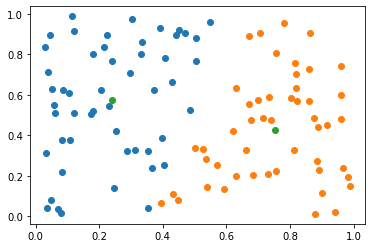

k =  3
Cijena: 

<ipython-input-5-f26f247b7dad>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  newPartition = np.array(newPartition)


 23.101075838602252 Calinski–Harabasz indeks:  75.90067667314263


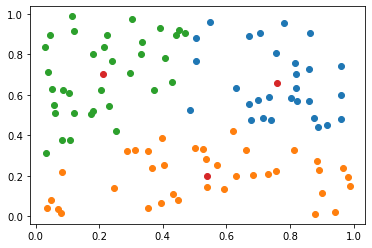

k =  4


<ipython-input-5-f26f247b7dad>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  newPartition = np.array(newPartition)


Cijena:  18.91926390230439 Calinski–Harabasz indeks:  97.81409488130781


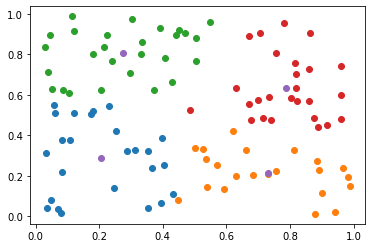

<ipython-input-5-f26f247b7dad>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  newPartition = np.array(newPartition)


k =  5
Cijena:  17.575410401771695 Calinski–Harabasz indeks:  83.69544935385686


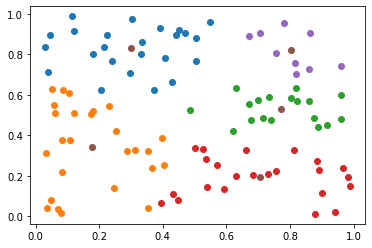

k =  6
Cijena:  15.011367290781786 Calinski–Harabasz indeks:  97.89003283827496


<ipython-input-5-f26f247b7dad>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  newPartition = np.array(newPartition)


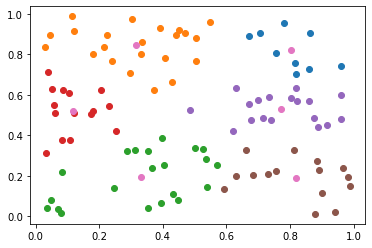

k =  7
Cijena:  13.656253926382654 Calinski–Harabasz indeks:  105.45794755301333


<ipython-input-5-f26f247b7dad>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  newPartition = np.array(newPartition)


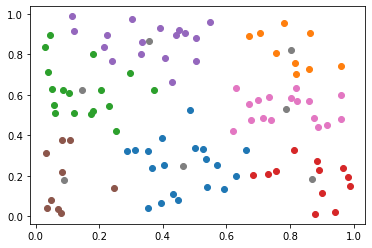

k =  8
Cijena:  13.181237256510716 Calinski–Harabasz indeks:  96.34857532127982


<ipython-input-5-f26f247b7dad>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  newPartition = np.array(newPartition)


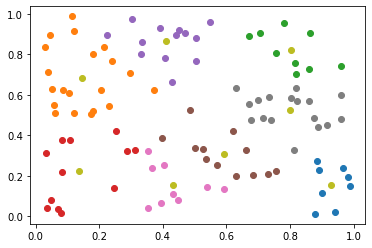

k =  9
Cijena:  12.11566840809268 Calinski–Harabasz indeks:  95.81670099891949


<ipython-input-5-f26f247b7dad>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  newPartition = np.array(newPartition)


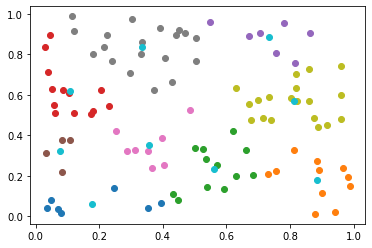

k =  10
Cijena:  11.193095722740557 Calinski–Harabasz indeks:  106.35541202115502


<ipython-input-5-f26f247b7dad>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  newPartition = np.array(newPartition)


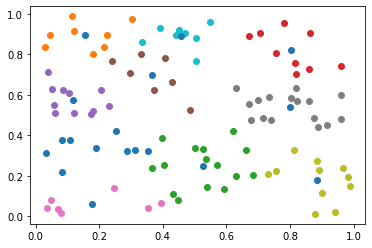

In [11]:
costChanges = []
for k in range(2,11):
    print("k = ", k)
    bestCenters, bestPartition, bestIterations, bestChanges, bestLabes = MyKMeans(X, k)
    bestCost = CostFunction(X, bestCenters)
    
    labels = bestLabes.reshape(-1,).astype(int)
    print("Cijena: ", bestCost, "Calinski–Harabasz indeks: ", calinski_harabasz_score(X, labels))
    
    for i in range(bestPartition.shape[0]):
        plt.scatter(bestPartition[i][:,0], bestPartition[i][:,1])
    plt.scatter(bestCenters[:,0], bestCenters[:,1])
    plt.show()

---
## Zadatak 3
U ovom zadatku je cilj pomoću k-means algoritma kompresirati sliku. <br>
Koristeći 24-bitnu reprezentaciju slike, svaki piksel je reprezentiran pomoću tri 8-bitna cijela broja (u rasponu 0-255), gdje ti cijeli brojevi predstavljaju intenzitet crvene (Red), zelene (Green) i plave (Blue). Što znači da svaki piksel može poprimiti jedan od $2^8$ intenziteta crvene, $2^8$ zelene i $2^8$ plave. Sve zajedno daje $2^{24}$ različitih boja. <br>
Vaš zadatak će biti jednu takvu sliku kompresirati na samo 16 boja. <br>
Pomoću k-means algoritma je potrebno odabrati 16 boja koje će reprezentirati sve boje na slici. <br>
Svaki piksel na slici nam predstavlja jedan podatak i piksele želimo grupirati u 16 grupa. Kada to napravimo - imamo 16 grupa tj. 16 boja, potrebno je na originalnoj slici sve piksele obojati u onu boju (grupu) kojoj pripadaju. 

Učitajte proizvoljnu sliku. Možete koristiti `PIL` biblioteku.  

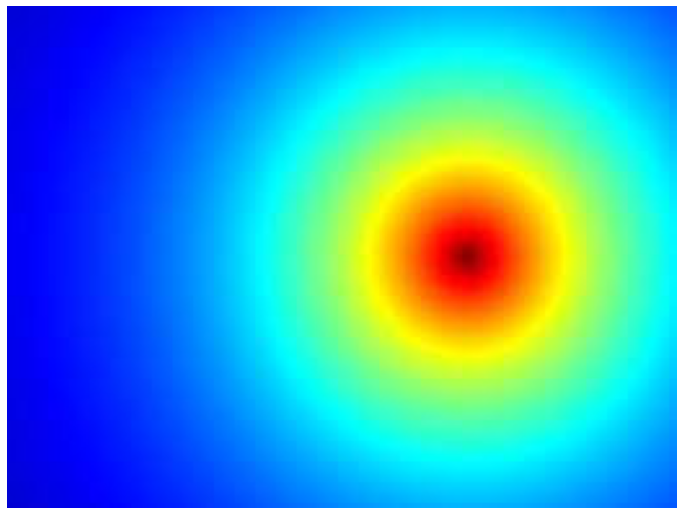

In [12]:
from PIL import Image
datapath = 'img1.jpg'
im = Image.open(datapath)
X = np.asarray(im,dtype=np.float32)/255
plt.figure(figsize=(12,12))
plt.imshow(X)
plt.axis('off')
plt.show()

In [13]:
w, h = im.size
colors = im.getcolors(w * h)
num_colors = len(colors) 
num_pixels = w*h 

print ('Number of pixels = ', num_pixels)
print ('Number of colors = ', num_colors)

Number of pixels =  50246
Number of colors =  10136


In [14]:
x, y, z = X.shape
print('X shape ', X.shape)

X1 = X.reshape(x*y, z)
print('X1 shape ', X1.shape)

X shape  (194, 259, 3)
X1 shape  (50246, 3)


In [15]:
n = 16
k_means = KMeans(n_clusters=n)
k_means.fit(X1)

KMeans(n_clusters=16)

In [16]:
centroids = k_means.cluster_centers_
labels = k_means.labels_
print('centroids shape ', centroids.shape)
print('labels shape ', labels.shape)
X2 = centroids[labels]
print('X2 shape ', X2.shape)

X3 = X2.reshape(x,y,z)
print('X3 shape ', X3.shape)

centroids shape  (16, 3)
labels shape  (50246,)
X2 shape  (50246, 3)
X3 shape  (194, 259, 3)


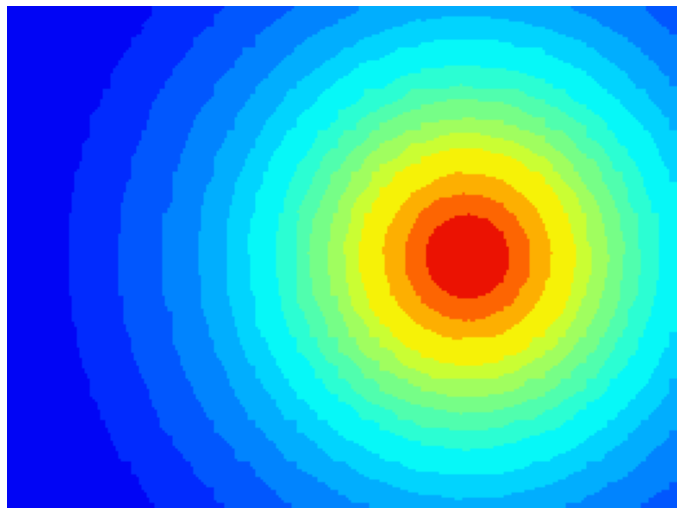

In [17]:
plt.figure(figsize=(12,12))
plt.imshow(X3)
plt.axis('off')
plt.show()

In [18]:
X4 = np.floor(X3*255)
X5 = X4.astype(np.uint8)

im1 = Image.fromarray(X5)
im1.save("img2.jpg")

---
## Zadatak 4 
Ucitajte podatke 'z1-data1.npy' i 'z1-data2.npy'. Pomoću kmeans algoritma (na vježbama smo pokazali kako koristiti kmeans algoritam iz paketa sklearn) grupirajte podatake u 5 klastera. Koristeći funkciju danu u predlošku, vizualizirajte podatke. 
<br>
Što možete reći o kmeans algoritmu na temelju dobivenog grafičkog prikaza?

In [19]:
# Funkcija za crtanje
from scipy.spatial.distance import cdist

def plot_kmeans(X,labels, centers, n_clusters=4, rseed=0, ax=None):
    # Proslijedite argumente
    # X- podaci
    # labels - oznake pripadnosi klasteru za svaki podatak
    # centers - centri klastera
    # n_cluster - broj klastera
    
    
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))


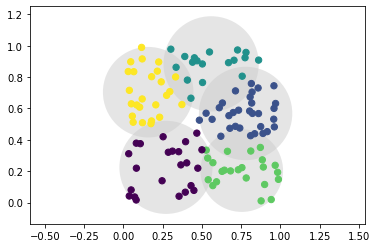

In [20]:
X1 = np.load('z1-data.npy')
X2 = np.load('z2-data.npy')

X = np.concatenate((X1,X2), axis = 0)
kmeans = KMeans(n_clusters=5).fit(X)
plot_kmeans(X,kmeans.labels_,kmeans.cluster_centers_,5)

---

## Zadatak 5
Implementirajte EM algoritam tako da mu proslijeđujete neke početne vrijednosti za parametre $\mu, \sigma, p$. 

- Pokrenite algoritam na podacima zadanim u 'z2-data.npy' s k = 2 i početnim vrijednostima parametara $\mu = [30,30]$, $\sigma = [100,100]$, $p = [0.5,0.5]$
    - Ispišite dobivene vrijednosti parametara, broj koraka koje je algoritam izvršio
    - Prikažite graf promjene vrijednosti funkcije log-izglednosti kroz iteracije
- Pokrenite algoritam s različitim vrijednostima k = 2, 3, 4, 5 tako da za svaki k proslijedite slučajno odabrate početne vrijednosti parametara i algoritam pokrenete 10 putazatim odaberete najbolji rezultat za od tih 10 za dani k. 
    - Za svaki k ispišite broj iteracija koje je algoritam izvršio. 
    - za svaki k prikažite graf promjene vrijednosti funkcije log-izglednosti kroz iteracije


In [159]:
X = np.load('z2-data1.npy')
centers = np.array([30.0,30.0])
deviation = np.array([100.0,100.0])
probability = np.array([0.5,0.5])
X

array([[24.61400269],
       [23.82609848],
       [29.39804934],
       ...,
       [41.45367005],
       [45.37500698],
       [32.71288634]])

In [ ]:
def LogFunction(X, centers, deviation):
    return -np.shape[0]/2 - (np.shape[0]*np.ln(deviation))  

In [154]:
def ExpectationStep(X, centers, deviation, probability):
    
    #Pretvaramo X iz tipa m*1 u tip m*k, gdje je svaki stupac ekvivalentan prvom stupcu kako bi mogli matrično računat
    Xnew = np.array([X[:,0],]*centers.shape[0]).T.reshape(-1,centers.shape[0])

    numerator = (probability/(deviation*np.sqrt(2*np.pi)))*np.exp((-(Xnew - centers)**2)/(2*deviation**2))
    denominator = np.sum(numerator, axis = 1).reshape(-1,1)

    sigma = numerator/denominator
    
    return sigma

In [155]:
def MaximizationStep(X, centers, deviation, probability, sigma):

    Xnew = np.array([X[:,0],]*centers.shape[0]).T.reshape(-1,centers.shape[0])
    
    numerator = np.sum((sigma*X).T, axis = 1)
    denominator = np.sum(sigma.T, axis = 1)
    newCenters = numerator/denominator
    
    numerator = np.sum((sigma * (Xnew-centers)).T, axis = 1)
    newDeviation = numerator/denominator
    
    numerator = denominator
    newProbability = numerator/X.shape[0]
    
    return newCenters, newDeviation, newProbability

In [157]:
def ExpectationMaximization(X, centers, deviation, probability):
    newCenters, newDeviation, newProbability = centers, deviation, probability
    oldCenters = []
    
    numIter = 0
    while not(np.array_equal(oldCenters,newCenters)):
        sigma = ExpectationStep(X, newCenters, newDeviation, newProbability)
        oldCenters = newCenters
        newCenters, newDeviation, newProbability = MaximizationStep(X, newCenters, newDeviation, newProbability, sigma)
        numIter = numIter + 1
        
    return newCenters, newDeviation, newProbability, numIter

(array([33.96797106, 33.96797106]),
 array([-1.45519152e-15, -1.45519152e-15]),
 array([0.5, 0.5]),
 2)

---
## Zadatak 6
---
Koristeći implementaciju EM algoritma iz prošlog zadatka trebate odrediti parametre za podatke koji su vam dani u datoteci 'z2-data' za k = 4. 
- Pokrenite algoritam koristeći slučajno odabrane parametre kao početne (algoritam pokrenite 10 puta i odaberite najbolji rezultat)
- Pokrenite k-means algoritam (može sklearn) na vašim podacima. Dobivena središte koritite kao početne vrijednosti za očekivanje. 

In [ ]:
# Vaš kod